In [3]:
import numpy as np
X = 2 * np.random.rand(100, 1)
y = 3 * X + np.random.rand(100, 1) + 5

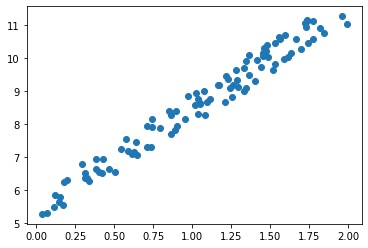

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.scatter(X, y, )
plt.show()

In [5]:
X_b = np.c_[np.ones((100, 1)), X]
print(X_b)
weights = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(weights)

[[1.         0.8633042 ]
 [1.         0.86526748]
 [1.         1.03857814]
 [1.         1.02545158]
 [1.         1.29423789]
 [1.         0.3845958 ]
 [1.         1.29021784]
 [1.         1.45665963]
 [1.         1.04932389]
 [1.         1.66737752]
 [1.         1.01965086]
 [1.         0.03884542]
 [1.         0.42229832]
 [1.         1.24467255]
 [1.         0.89816141]
 [1.         0.3391621 ]
 [1.         1.11115971]
 [1.         1.34332247]
 [1.         0.11860587]
 [1.         0.54358447]
 [1.         1.81603379]
 [1.         1.48010799]
 [1.         1.08029363]
 [1.         1.61560206]
 [1.         1.77648716]
 [1.         0.42890477]
 [1.         1.69858133]
 [1.         0.73982888]
 [1.         1.74161712]
 [1.         1.21106555]
 [1.         1.23089738]
 [1.         0.90124589]
 [1.         0.73696435]
 [1.         0.06803622]
 [1.         1.33528237]
 [1.         0.31039558]
 [1.         0.57826016]
 [1.         1.2792967 ]
 [1.         0.3834615 ]
 [1.         0.9529975 ]


In [6]:
np.array([[1.0, 10]]).dot(weights) # example prediction (1.0 is the appended for the bias term)

array([[36.28241162]])

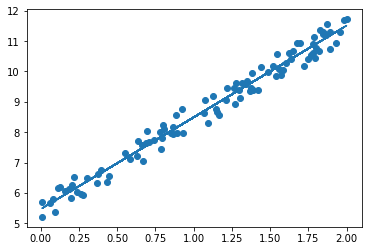

In [7]:
X_test = 2 * np.random.rand(100, 1)
y_test = 3 * X_test + np.random.rand(100, 1) + 5
X_test_b = np.c_[np.ones((100, 1)), X_test]

plt.scatter(X_test, y_test)
weights = np.linalg.inv(X_test_b.T.dot(X_test_b)).dot(X_test_b.T).dot(y_test)
plt.plot(X_test, X_test_b.dot(weights))
plt.show()

In [8]:
theta = np.random.rand(2, 1)
learning_rate = 0.1
tolerance = 0.00001
gradient = np.ones((2, 1))
count = 0
print('start', theta)
while np.linalg.norm(gradient) > tolerance:
  gradient = (2 / len(X_b)) * X_b.T.dot(X_b.dot(theta) - y)
  theta = theta - learning_rate * gradient
  count += 1
print('end', theta)
print('total iterations', count)

start [[0.47362737]
 [0.63922296]]
end [[5.39702366]
 [3.08856151]]
total iterations 444


In [9]:
# stochastic gradient descent with learning schedule
t0, t1 = 5, 50
def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.rand(2, 1)
epochs = 50
m = len(X_b)

print(theta)
for epoch in range(epochs):
  for i in range(m):
    index = np.random.randint(m)
    xi = X_b[index:index+1]
    yi = y[index:index+1]
    gradient = 2 * (xi.T.dot(xi).dot(theta) - xi.T.dot(yi))
    theta = theta - learning_schedule(epoch * m + i) * gradient
print(theta)

[[0.99025253]
 [0.50149408]]
[[5.39292529]
 [3.08642775]]


In [10]:
from sklearn.linear_model import SGDRegressor
model = SGDRegressor(max_iter=1000, tol=0.001, eta0=0.1, penalty=None)
model.fit(X, y.ravel())
print(X[0], y[0])
print(model.predict([[2.0]]))
print(model.intercept_, model.coef_)

[0.8633042] [7.71074053]
[11.62121513]
[5.38365667] [3.11877923]


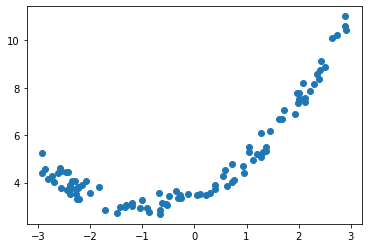

In [11]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 3 + np.random.rand(m, 1)
plt.scatter(X, y)
plt.show()


In [12]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.89134604]
[2.89134604 8.35988191]


In [13]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[3.45794688] [[1.00539476 0.49984135]]


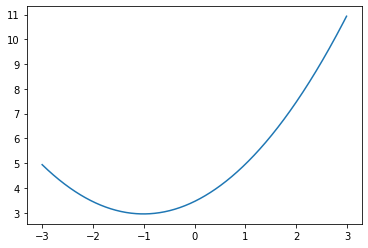

In [14]:
x_axis = np.arange(-3.0, 3.0, 0.01)
x_axis = x_axis.reshape((len(x_axis), 1))
x_poly_axis = poly_features.fit_transform(x_axis)

preds = lin_reg.predict(x_poly_axis)

plt.plot(x_axis, preds)
plt.show()

In [15]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=3, label='val')
  plt.gca().set_ylim([0, 3])
  plt.show()

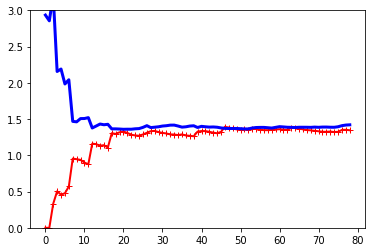

In [16]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

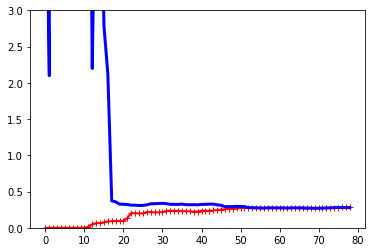

In [17]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
  ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
  ('lin_reg', LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

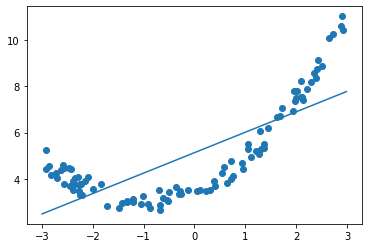

In [18]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1.0, solver='cholesky')
ridge_reg.fit(X, y)
plt.plot(x_axis, ridge_reg.predict(x_axis))
plt.scatter(X, y)
plt.show()

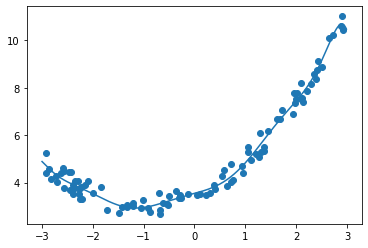

In [19]:
ridge_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=10, include_bias=False)),
  ('ridge', Ridge(alpha=0.1, solver='cholesky')),
])
ridge_poly.fit(X, y)
plt.plot(x_axis, ridge_poly.predict(x_axis))
plt.scatter(X, y)
plt.show()


/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


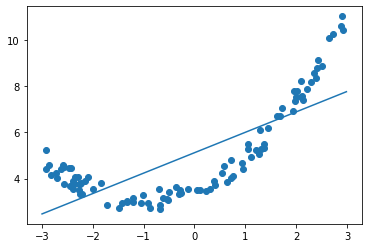

In [20]:
# ridge regression using stochastic gradient descent
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(X, y)
plt.plot(x_axis, sgd_reg.predict(x_axis))
plt.scatter(X, y)
plt.show()

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


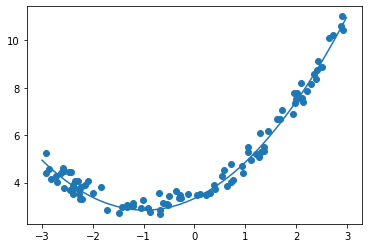

In [21]:
sgd_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=2, include_bias=False)),
  ('ridge', SGDRegressor(penalty='l2')),
])
sgd_poly.fit(X, y)
plt.plot(x_axis, sgd_poly.predict(x_axis))
plt.scatter(X, y)
plt.show()

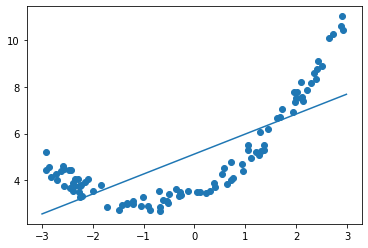

In [22]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
plt.plot(x_axis, lasso_reg.predict(x_axis))
plt.scatter(X, y)
plt.show()

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.298e+01, tolerance: 4.454e-02
  model = cd_fast.enet_coordinate_descent(


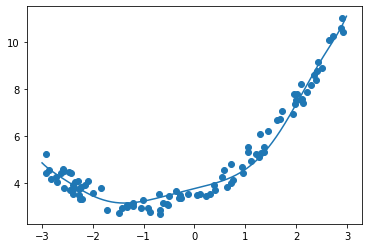

In [23]:
lasso_poly = Pipeline([
  ('poly', PolynomialFeatures(degree=10, include_bias=False)),
  ('ridge', Lasso(alpha=0.1)),
])
lasso_poly.fit(X, y)
plt.plot(x_axis, lasso_poly.predict(x_axis))
plt.scatter(X, y)
plt.show()

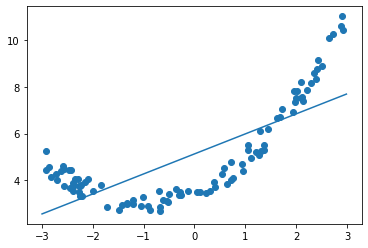

In [24]:
from sklearn.linear_model import ElasticNet
reg = ElasticNet(alpha=0.1, l1_ratio=0.5)
reg.fit(X, y)
plt.plot(x_axis, reg.predict(x_axis))
plt.scatter(X, y)
plt.show()

/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.044e+01, tolerance: 4.454e-02
  model = cd_fast.enet_coordinate_descent(


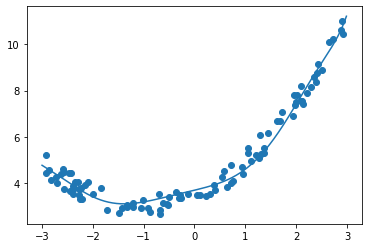

In [25]:
poly = Pipeline([
  ('poly', PolynomialFeatures(degree=10, include_bias=False)),
  ('ridge', ElasticNet(alpha=0.1, l1_ratio=0.5)),
])
poly.fit(X, y)
plt.plot(x_axis, poly.predict(x_axis))
plt.scatter(X, y)
plt.show()

In [26]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler

poly_scaler = Pipeline([
  ('poly', PolynomialFeatures(degree=10, include_bias=False)),
  ('scaler', StandardScaler()),
])

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.fit_transform(X_val)

sgd = SGDRegressor(max_iter=1, tol=-np.Infinity, warm_start=True, penalty=None, learning_rate='constant', eta0=0.0005)
minimum_val_error = float('inf')
best_epoch = None
best_model = None
for epoch in range(1000):
  sgd.fit(X_train_poly_scaled, y_train)
  y_val_predict = sgd.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)
  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd)

print(best_epoch, minimum_val_error)


/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/uti

995 0.1532960738634795


/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/uti

In [46]:
# Logistic regression from scratch batch gradient descent
from sklearn.base import BaseEstimator
from numpy import exp, log

def sigmoid(x):
  return 1 / (1 + exp(-x))

class CustomLogisticRegression(BaseEstimator):
  def __init__(self, eta0=0.1, tolerance=0.001, max_epochs=5000):
    self.eta0 = eta0
    self.tolerance = tolerance
    self.theta = np.random.rand(X.shape[len(X.shape)-1], 1)
    self.max_epochs = max_epochs
  
  def __learning_schedule(self, epoch):
    # return self.eta0 * (1.0 / (1.0 + (epoch - 1)))
    return self.eta0
  
  def fit(self, X, y):
    epoch = 1
    gradient = np.Inf
    while np.linalg.norm(gradient) > self.tolerance:
      alpha = self.__learning_schedule(epoch)
      gradient = X.T.dot(sigmoid(X.dot(self.theta)) - y)
      self.theta = self.theta - (alpha / m) * gradient
      print(np.linalg.norm(gradient))
      epoch += 1

  def predict(self, X):
    return np.where(sigmoid(X.dot(self.theta)) > 0.5, 1, 0)
  


In [51]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))
print(iris['feature_names'])
X = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int).reshape((len(X), 1))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

clf = CustomLogisticRegression()
clf.fit(X_train, y_train)

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
15.980611447812018
15.175628768532661
14.403027738725521
13.662560189938915
12.953824427558047
12.27628706845176
11.629303632562364
11.012137674554792
10.423978325936005
9.863956187706497
9.331157569238304
8.82463711188747
8.343428867375424
7.886555922875934
7.453038678680246
7.04190189184223
6.652180601732954
6.282925052181718
5.9332047208821015
5.602111560846986
5.2887625515898256
4.992301649924683
4.711901222223787
4.446763031951399
4.196118848520683
3.959230736146133
3.7353910744767775
3.5239223564501323
3.3241768030213183
3.13553582919595
2.957409391110227
2.789235239730922
2.63047810305466
2.480628815434333
2.3392034098100627
2.20574218613372
2.0798087671132484
1.9609891505287882
1.848890765754783
1.7431415407308508
1.643388984430084
1.5492992888537325
1.4605564537123863
1.3768614362158935
1.29793132777

/var/folders/sw/q7k30xcj51x3tc06z506z3n00000gn/T/ipykernel_10418/2102543086.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris['target'] == 2).astype(np.int).reshape((len(X), 1))


In [48]:
from sklearn.metrics import confusion_matrix, log_loss

preds = clf.predict(X_test)
print(log_loss(y_test, preds))
print(confusion_matrix(y_test, preds))

1.1512925464970236
[[19  0]
 [ 1 10]]


In [52]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
print(log_loss(y_test, preds))
print(confusion_matrix(y_test, preds))

9.992007221626413e-16
[[19  0]
 [ 0 11]]


/Users/carlschader/programming/ml-tensorflow/.venv/lib/python3.10/site-packages/sklearn/utils/validation.py:1111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


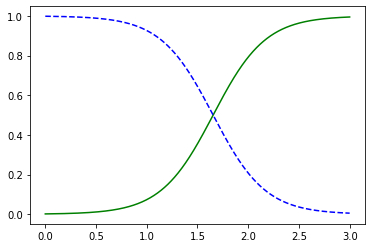

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = clf.predict_proba(X_new)
plt.plot(X_new, y_proba[:, 1], 'g-', label='Iris virginica')
plt.plot(X_new, y_proba[:, 0], 'b--', label='Not Iris virginica')
plt.show()

In [56]:
# softmax
X = iris['data'][:, (2, 3)]
y = iris['target']
print(y)

X_train, X_test, y_train, y_test = train_test_split(X, y)

softmax_clf = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_clf.fit(X_train, y_train)
preds = softmax_clf.predict(X_test)

print(confusion_matrix(y_test, preds))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[14  0  0]
 [ 0 14  0]
 [ 0  0 10]]


In [167]:
# Custom softmax regression
from scipy.special import softmax
from sklearn.preprocessing import OneHotEncoder

# X mxn
# Theta nxo
# Y mxo

class CustomSoftmaxRegression(BaseEstimator):
  def __init__(self, eta0=1.0, tolerance=0.0001, max_epochs=100000, early_stopping=True):
    self.eta0 = eta0
    self.tolerance = tolerance
    self.max_epochs = max_epochs
    self.early_stopping = early_stopping
    self.theta = None
  
  def __learning_schedule(self, epoch):
    return self.eta0 * (1000.0 / (1000.0 + (epoch - 1)))
    # return self.eta0
  
  def __calc_gradient(self, X, y_enc):
    return (1.0 / len(X)) * (X.T.dot(softmax(X.dot(self.theta), axis=1) - y_enc))

  def fit(self, X, y):
    enc = OneHotEncoder()
    y_enc = enc.fit_transform(y.reshape(-1,1)).toarray()
    self.theta = np.random.rand(X.shape[len(X.shape)-1], y_enc.shape[len(y_enc.shape)-1])
    epoch = 1
    gradient = np.Inf
    min_error = np.Inf
    best_theta = self.theta
    while np.linalg.norm(gradient) > self.tolerance and epoch <= self.max_epochs:
      alpha = self.__learning_schedule(epoch)
      gradient = self.__calc_gradient(X, y_enc)
      self.theta = self.theta - alpha * gradient
      epoch += 1
      val_error = log_loss(y_test, self.proba(X_test))
      if val_error < min_error:
        min_error = val_error
        best_theta = self.theta
    print(min_error)
    self.theta = best_theta

  def proba(self, X):
    return softmax(X.dot(self.theta), axis=1)

  def predict(self, X):
    return np.argmax(softmax(X.dot(self.theta), axis=1), axis=1)

In [168]:
X = iris['data']
y = iris['target']

X_train, X_test, y_train, y_test = train_test_split(X, y)

soft_clf = CustomSoftmaxRegression()
soft_clf.fit(X_train, y_train)

preds = soft_clf.predict(X_test)
correct = 0
for i in range(len(y_test)):
  if y_test[i] == preds[i]:
    correct += 1

print(correct, len(y_test))
print(confusion_matrix(y_test, preds))

0.0525219171168612
37 38
[[11  0  0]
 [ 0  9  1]
 [ 0  0 17]]
